# Olympic Games Analysis

**NAME:** Julia Emma Maria Antonioli

### Preliminaries

Import the libraries that will be needed throughout the assignment.

In [1]:
# imports pandas
import pandas as pd

import os

import matplotlib.pyplot as plt


## Datasets
### Olympic Games Data

Data from the Olympic Games, for the period considered, were collected for each individual athlete in a given Olympic event (or race) and recorded in the file `athlete_events.csv`. For example, the following entry is for the first gold medal won by a Portuguese woman:

| |ID |Name |Sex |Age |Height |Weight |Team |NOC |Games |Year |Season |City |Sport |Event |Medal|
|---|---|-------|-------|-------|-------|-------|- ------|-------|-------|-------|-------|-------|--- ----|-----------|-----|
|164334 |82494 |Rosa Mara Correia dos Santos Mota |F |30 |157 |45 |Portugal |POR |1988 Summer |1988 |Summer |Seoul |Athletics |Athletics Women's Marathon |Gold|

The file structure is illustrated in the figure below:

![Olympic data](imgs/raw_athlete_events.png)

As can be seen, various information is recorded for each individual athlete in a given Olympic event, such as name (`Name`), gender (`Sex`), age (`Age`), edition of the Olympic Games (`Games `), the Olympic event (`Event`) among others. It should be noted that, for each athlete, there is an identifier (`ID`) that is unique to that athlete and invariable - it remains for all Olympic events in which that athlete has participated, regardless of the edition (year).

Regarding Olympic events, there are individual events and team events - e.g. football and the 4x100m relay are team events. In team events, the data includes one record for each athlete on the team.

### Population

CSV file `population.csv` includes information about the population of each country for a given year.

The csv file includes ISO3 code of the country (in lower case) (`geo`), the name of the country (`name`), the year (`time`) and the population (`population`).

### Country codes

CSV file `codes.csv` includes information about the different codes used for different countries.

The csv file includes, among other, the name of the country (`Country`), ISO3 code (`ISO3`) and the national olympic code (`IOC`).


The following code loads the datasets.


In [2]:
dataFileName = os.path.join( "data", "athlete_events.csv")

dataDF = pd.read_csv(dataFileName)

print(dataDF.head(5))

   ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal  
0       Basketball Men's Basketball   NaN  
1      Judo Men's Extra-Lightweight   NaN  
2           Football Men's

In [3]:
codesFileName = os.path.join( "data", "codes.csv")

codesDF = pd.read_csv(codesFileName)

print(codesDF.head(5))

          Country ISO2 ISO3   ISON  IOC FIPS Plates Domain
0     Afghanistan   AF  AFG    4.0  AFG   AF    AFG    .af
1   Åland Islands   AX  ALA  248.0  NaN  NaN     AX    .ax
2         Albania   AL  ALB    8.0  ALB   AL     AL    .al
3         Algeria   DZ  DZA   12.0  ALG   AG     DZ    .dz
4  American Samoa   AS  ASM   16.0  ASA   AQ    USA    .as


In [4]:
populationFileName = os.path.join( "data", "population.csv")

populationDF = pd.read_csv(populationFileName)

print(populationDF.head(5))

   geo         name  time  Population
0  afg  Afghanistan  1800   3280000.0
1  afg  Afghanistan  1801   3280000.0
2  afg  Afghanistan  1802   3280000.0
3  afg  Afghanistan  1803   3280000.0
4  afg  Afghanistan  1804   3280000.0


For data on atheletes, there are some information missing. We can compute the number of entries missing using the following code.

**NOTE:** the missing information on Medal is expected - it just means that the athlete has won no medal in the event.

In [5]:
dataDF.isna().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

## Question 1 

In this question, we start by exploring the data available with simple queries.

### **1.a)** How many athletes have participated in Summer Olympics and how many athlete participated in Winter Olympics?



In [6]:
#Create a dataframe including only information regarding Summer Olympics
oly_s = dataDF[dataDF["Season"] == "Summer"].groupby("Name").count()

#Create a dataframe including only information regarding Winter Olympics
oly_w = dataDF[dataDF["Season"]=="Winter"].groupby("Name").count()

#Print the length of the dataframe to discover the amount of athletes that have participated
print("The amount of athletes that have participated in Summer Olympics is: ", len(oly_s), "\n")
print("The amount of athletes that have participated in Winter Olympics is: ", len(oly_w))


The amount of athletes that have participated in Summer Olympics is:  116122 

The amount of athletes that have participated in Winter Olympics is:  18923


### **1.b)** Who are the three youngest and oldest athletes that won a Gold medal in the Olympic games?

Show the following information about each athelete: Name, Age, Team, Games, Sport and Event.


In [7]:
#Create a dataframe including only information about athletes who have one a Gold medal
ath_medal = dataDF[dataDF["Medal"]=="Gold"]

#Create a dataframe including information regarding the three oldest and youngest atheletes that won a Gold medal
medal_young = ath_medal[["Name", "Age", "Team", "Games", "Sport", "Event"]].nsmallest(3, "Age")
medal_old = ath_medal[["Name", "Age", "Team", "Games", "Sport", "Event"]].nlargest(3, "Age")

#Print resulting dataframe
print("The three youngest athletes that won a Gold medal in the Olympics games are: \n", medal_young)
print("\n")
print("The three oldest athletes that won a Gold medal in the Olympics games are: \n", medal_old)


The three youngest athletes that won a Gold medal in the Olympics games are: 
                                      Name   Age           Team        Games  \
27207                       Hans Bourquin  13.0    Switzerland  1928 Summer   
52010  Donna Elizabeth de Varona (-Pinto)  13.0  United States  1960 Summer   
73581                          Fu Mingxia  13.0          China  1992 Summer   

          Sport                                            Event  
27207    Rowing                         Rowing Men's Coxed Pairs  
52010  Swimming  Swimming Women's 4 x 100 metres Freestyle Relay  
73581    Diving                          Diving Women's Platform  


The three oldest athletes that won a Gold medal in the Olympics games are: 
                         Name   Age           Team        Games  \
105199       Charles Jacobus  64.0  United States  1904 Summer   
233390     Oscar Gomer Swahn  64.0         Sweden  1912 Summer   
104003  Isaac Lazarus Israls  63.0    Netherlands  1928 Sum

### 1.c) Who are the top-10 athletes that have won more Gold medals in the Olympic Games?



In [8]:
#Create a new dataframe including a new column which calculates the sum of Gold medals won by each athlete
Medal_sumy = ath_medal.groupby("Name").size().reset_index(name = "Medal_sum")

#Create a new dataframe including only the top 10 athletes based on the amount of Gold medals they won
top_10 = Medal_sumy.nlargest(10, "Medal_sum")

#Print resulting dataframe
print("The top 10 athletes who have won more Gold medals in the Olympic Games are: \n", top_10)

The top 10 athletes who have won more Gold medals in the Olympic Games are: 
                                                  Name  Medal_sum
6633                          Michael Fred Phelps, II         23
7836                      Raymond Clarence "Ray" Ewry         10
2925                   Frederick Carlton "Carl" Lewis          9
5591               Larysa Semenivna Latynina (Diriy-)          9
6336                                Mark Andrew Spitz          9
7386                             Paavo Johannes Nurmi          9
1102                           Birgit Fischer-Schmidt          8
4493  Jennifer Elisabeth "Jenny" Thompson (-Cumpelik)          8
6488                   Matthew Nicholas "Matt" Biondi          8
7220                              Ole Einar Bjrndalen          8


### 1.d) For Summer Olympics, after 1950, who are the athletes that have won more medals in each edition?

Show the following information: Year, Name of athlete, and number of medals.

In [9]:
#Create a new dataframe including information on atheletes who have won  Medals from Summer Olympics from 1950 on 
oly_1 = dataDF[(dataDF["Year"] >= 1950) & (dataDF["Season"] == "Summer")]

#Group by Year and Athlete and count the respective amount of medals
top_medals = oly_1.groupby(["Year", "Name"])["Medal"].count().reset_index(name="Medal_count")

#sort values based on Year and then Medal count
top_ath = top_medals.sort_values(by=["Year","Medal_count"], ascending=[True, False])

#drop year duplicates to include only the top athlete for each year
top_ath1 = top_ath.drop_duplicates(subset="Year")
print(top_ath1)


        Year                                Name  Medal_count
3142    1952      Mariya Kindrativna Horokhovska            7
6790    1956  Larysa Semenivna Latynina (Diriy-)            6
8897    1960         Borys Anfiyanovych Shakhlin            7
16459   1964  Larysa Semenivna Latynina (Diriy-)            6
22413   1968         Mikhail Yakovlevich Voronin            7
28677   1972                   Mark Andrew Spitz            7
35584   1976        Nikolay Yefimovich Andrianov            7
37658   1980     Aleksandr Nikolayevich Dityatin            8
46514   1984                             Li Ning            6
54817   1988      Matthew Nicholas "Matt" Biondi            7
66823   1992       Vitaly Venediktovich Shcherbo            6
67649   1996             Aleksey Yuryevich Nemov            6
77980   2000             Aleksey Yuryevich Nemov            6
94794   2004             Michael Fred Phelps, II            8
105468  2008             Michael Fred Phelps, II            8
116290  

### 1.e) For each athlete, compute the number of gold, silver and bronze medals she/he has won.

**Suggestions:** two alternative suggestion are investigating pivot tables and custom defined aggregation functions.


In [10]:
#Create a pivot table based on Athlete's Name and type of medals won
pivot1 = pd.pivot_table(dataDF[["Name", "Medal"]], columns = "Medal", index = "Name", aggfunc= "size")

#Create a new pivot table based on Athlete's Name in order to get rid of NA values
pivot2 = pivot1.groupby("Name").sum()

#Reset pivot table index
pivot2.reset_index()


Medal,Name,Bronze,Gold,Silver
0,A. Albert,0.0,1.0,0.0
1,A. Dubois,1.0,0.0,1.0
2,"A. Joshua ""Josh"" West",0.0,0.0,1.0
3,A. Lawry,0.0,0.0,1.0
4,A. M. Woods,0.0,0.0,1.0
...,...,...,...,...
28197,va Rakusz,1.0,0.0,1.0
28198,va Risztov,0.0,1.0,0.0
28199,va Szkely (-Gyarmati),0.0,1.0,1.0
28200,ver Maximiliano David Banega,0.0,1.0,0.0


### 1.f) For the games of 2016, print the table of medals for each country.

**NOTE:** for collective events (e.g. football, 4*100 meters), you should count only one medal for a given event.
In the cell after the code, explain the rationale of the code to achieve this goal - your solution does not need to be perfect, but only an approximation of the real value.


In [11]:
#filter to only include 2016 Summer Olympics
olys16 = dataDF[dataDF["Games"] == "2016 Summer"]

#remove duplicates from row
olys16_1= olys16.drop_duplicates(subset=["NOC", "Year", "Event", "Medal"])

#groupby country and count total amount of medals respectively
med_con = olys16_1.groupby("NOC")["Medal"].count().reset_index()

#create a list with new column names
col_ = ["Country", "Total"]

#assign new column names to the DataFrame
med_con.columns = col_

#sort values to have from highest to lowest
med_con.sort_values(by="Total", ascending=False)


,Country,Total
198,USA,121
38,CHN,70
68,GBR,67
159,RUS,56
72,GER,42
...,...,...
94,IVB,0
100,KGZ,0
101,KIR,0
1,ALB,0


**Rationale:** 
I started by filtering the dataset to only include 2016 summer and after dropped the duplicates including the same "NOC", "Year", "Event", "Medal". I did this in order to only have one row for medals won by each country in each event. After I grouped by country and counted the total for each and then I gave the columns new names.

## Question 2

It is normal that smaller countries conquer less medals, as their population is smaller.
In this question, we try to put the number of medals into prespective, considering the population of countries.




### 2.a) For the games of 2016, print the table of medals for each country per million inhabitants.



In [12]:
#make the values in geo column upper case in order for them to be in the same format as in the med_con DataFrame
populationDF["geo"] = populationDF["geo"].str.upper()

#filter for year 2016 only
pop1 = populationDF[populationDF["time"] == 2016]

#join the two dataframes together based on the country
df1 = med_con.join(pop1.set_index("geo"), on="Country")

#add a new column with the tables of medals for each country per million inhabitants
df1["Ratio"] = (df1["Total"]/df1["Population"])*1000000

#create a new dataframe including just country and the ratio in descending order
df2=df1[["Country", "Ratio"]].sort_values(by = "Ratio", ascending = False)

#drop Na values
df2.dropna()

,Country,Ratio
27,BRN,4.694902
95,JAM,3.924794
141,NZL,3.855974
70,GEO,1.856217
12,AZE,1.804286
...,...,...
105,LAO,0.000000
1,ALB,0.000000
100,KGZ,0.000000
90,ISL,0.000000


## Question 3

This third question focus on processing the information on a time series for plotting it.


### 3.a) Display the information about the number of athletes and medals wons by a country in the Olympic games over the years.

Select a country that has a significative number of medals and plot the results.
Discuss the rationale of your solution, including why you have decided to show the lines you are presenting and any processing you have done to the lines.


    Year  Medal_count  Athlete_count
0   1896            0              1
1   1900            5             23
2   1904            0              1
3   1906           56             76
4   1908            8             66
5   1912           25             66
6   1920           84            174
7   1924           51            200
8   1928           72            174
9   1932           77            112
10  1936           76            244
11  1948           67            215
12  1952           54            231
13  1956           47            135
14  1960           88            280
15  1964           51            167
16  1968           33            167
17  1972           25            224
18  1976           31            210
19  1980           37            159
20  1984           63            268
21  1988           29            253
22  1992           45            304
23  1996           71            340
24  2000           65            361
25  2004          104            364
2

Text(0.5, 1.0, 'Medal and Athlete Count for Italy during Summer Olympics')

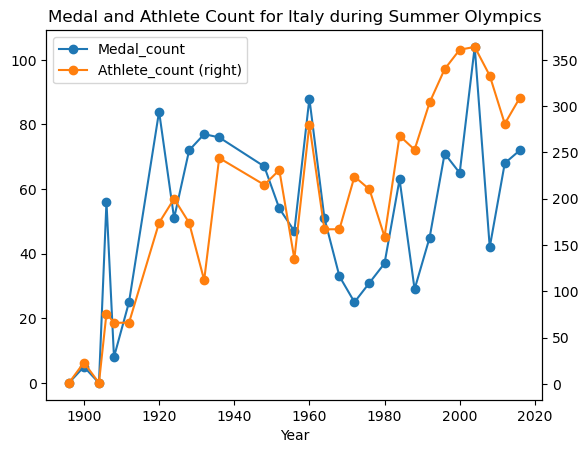

In [13]:
#filter the data for Italy & Summer
itaS = dataDF[(dataDF["NOC"] == "ITA") & (dataDF["Season"]=="Summer")]

#create new dataframe with the sum of medals per year in italy
ita_mS = itaS.groupby("Year")["Medal"].count().reset_index(name="Medal_count")

#create new dataframe with the sum of athletes per year in italy
ita_aS = itaS.groupby("Year")["Name"].nunique().reset_index(name="Athlete_count")

#merge the two dataframes together 
ita_infoS = ita_mS.join(ita_aS.set_index("Year"), on="Year")
print(ita_infoS)

#plot the data
ita_infoS.plot(x="Year", y=["Medal_count", "Athlete_count"], secondary_y="Athlete_count", marker='o')
plt.title ("Medal and Athlete Count for Italy during Summer Olympics")

    Year  Medal_count  Athlete_count
0   1924            0             23
1   1928            0             13
2   1932            0             12
3   1936            0             40
4   1948            1             54
5   1952            2             33
6   1956            8             65
7   1960            1             28
8   1964           10             61
9   1968            8             47
10  1972            9             44
11  1976            4             58
12  1980            3             46
13  1984            2             73
14  1988            8             58
15  1992           21            107
16  1994           32            104
17  1998           17            113
18  2002           21            108
19  2006           25            179
20  2010            5            109
21  2014           14            110


Text(0.5, 1.0, 'Medal and Athlete Count for Italy during Winter Olympics')

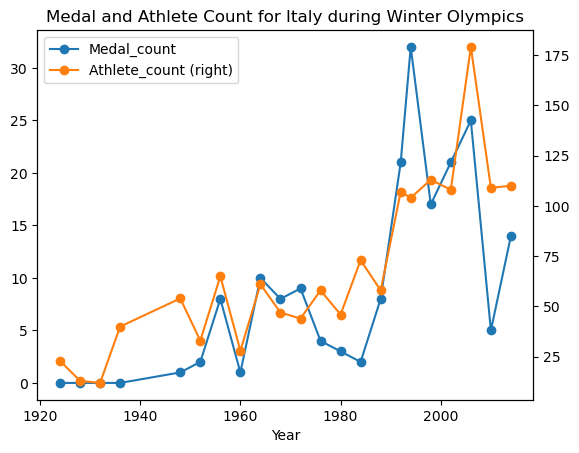

In [14]:
#filter the data for Italy & Winter
itaW = dataDF[(dataDF["NOC"] == "ITA") & (dataDF["Season"]=="Winter")]

#create new dataframe with the sum of medals per year in italy
ita_mW = itaW.groupby("Year")["Medal"].count().reset_index(name="Medal_count")

#create new dataframe with the sum of athletes per year in italy
ita_aW = itaW.groupby("Year")["Name"].nunique().reset_index(name="Athlete_count")

#merge the two dataframes together 
ita_infoW = ita_mW.join(ita_aW.set_index("Year"), on="Year")
print(ita_infoW)

#plot the data
ita_infoW.plot(x="Year", y=["Medal_count", "Athlete_count"], secondary_y="Athlete_count", marker='o')
plt.title ("Medal and Athlete Count for Italy during Winter Olympics")

**Rationale:** 
1. I decided to plot Italian data for multiple reasons: (1) Italy participates in the Olympics since 1896, opposed to for example China who does only since 1932; (2) They are in 9th place for amount of medals won
2. I started by filtering the dataframe for Italy and Summer Olympics only. I'm analysing the two Season Olympics seperately because if both Seasons are taken into consideration at the same time, the data could be contaminated as they have varying characteristics
3. I then proceeded to create two new dataframes based on (1) sum of medals won and (2) amount of athelets who participated
4. I merged the two dataframes together based on the index "Year" in order to plot the data on a unique graph with "Medal_count" and "Athlete_count" on opposing y axis
5. This plot allows to see how the number of athletes and the sum of medals per Summer Olympics have changed over the years and how they on a first glance seem to be highly correlated
6. I then repeated the same process for Winter Olympics

On average it seems that there is mostly a positive correlation between the amount of athletes for each country and the amount of medals awarded (with some exceptions)

### 3.b) Display trends of athletes and medals for a given country.

There might be some editions that are an outlier in the number of athletes or medals a given country wins. Instead of plotting the actual values, plot trend lines.



    Year  Medal_count  Athlete_count  Athlete - Simple Moving AVG
0   1896            0              1                          NaN
1   1900            5             23                          NaN
2   1904            0              1                          NaN
3   1906           56             76                          NaN
4   1908            8             66                         33.4
5   1912           25             66                         46.4
6   1920           84            174                         76.6
7   1924           51            200                        116.4
8   1928           72            174                        136.0
9   1932           77            112                        145.2
10  1936           76            244                        180.8
11  1948           67            215                        189.0
12  1952           54            231                        195.2
13  1956           47            135                        187.4
14  1960  

Text(0.5, 1.0, 'Simple Moving Average for Italy during Summer Olympics')

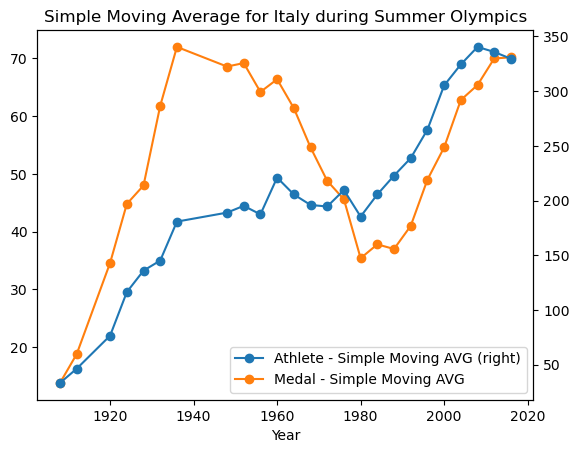

In [15]:
#Simple Moving Average Athlete count plot for Summer Olympics

#calculate the simple MA for athlete count with a window size of 5 (20 years)
ita_infoS["Athlete - Simple Moving AVG"] = ita_infoS["Athlete_count"].rolling(window=5, center=False).mean()
print(ita_infoS)

#calculate the simple MA for medal count with a window size of 5 (20 years)
ita_infoS["Medal - Simple Moving AVG"] = ita_infoS['Medal_count'].rolling(window=5, center=False).mean()

#plot the data and assign it a title
ita_infoS.plot(x="Year", y=["Athlete - Simple Moving AVG", "Medal - Simple Moving AVG"], secondary_y = "Athlete - Simple Moving AVG", marker="o")
plt.title ("Simple Moving Average for Italy during Summer Olympics")

    Year  Medal_count  Athlete_count  Athlete - Simple Moving AVG
0   1924            0             23                          NaN
1   1928            0             13                          NaN
2   1932            0             12                          NaN
3   1936            0             40                          NaN
4   1948            1             54                         28.4
5   1952            2             33                         30.4
6   1956            8             65                         40.8
7   1960            1             28                         44.0
8   1964           10             61                         48.2
9   1968            8             47                         46.8
10  1972            9             44                         49.0
11  1976            4             58                         47.6
12  1980            3             46                         51.2
13  1984            2             73                         53.6
14  1988  

Text(0.5, 1.0, 'Simple Moving Average for Italy during Winter Olympics')

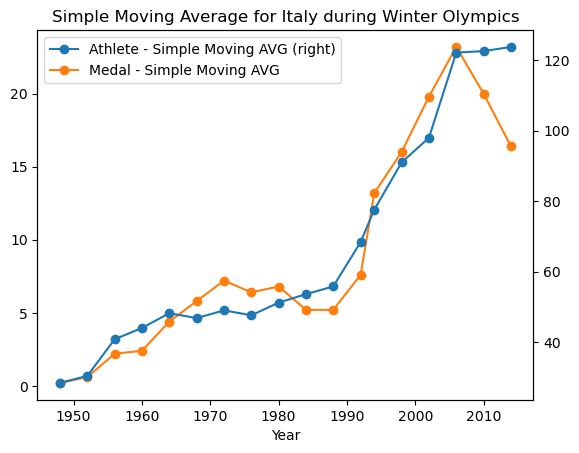

In [16]:
#calculate the simple MA for athlete count with a window size of 5 (20 years)
ita_infoW["Athlete - Simple Moving AVG"] = ita_infoW["Athlete_count"].rolling(window=5, center=False).mean()
print(ita_infoW)

#calculate the simple MA for medal count with a window size of 5 (20 years)
ita_infoW["Medal - Simple Moving AVG"] = ita_infoW['Medal_count'].rolling(window=5, center=False).mean()

#plot the data and assign it a title
ita_infoW.plot(x="Year", y=["Athlete - Simple Moving AVG", "Medal - Simple Moving AVG"], secondary_y = "Athlete - Simple Moving AVG", marker="o")
plt.title ("Simple Moving Average for Italy during Winter Olympics")

**Rational:**
From these two graphs one can deduce that there seems to be a significant correlation between the amount of athletes per country and the sum of medals awarded to the country. This makes logical sense as the chances of winning a medal go up as a country has more athletes participating in more events. In the Winter Olympics, we can observe this: As the amount of athletes joining the olympics is steadily increasing so does the medal count (considering 2006 and 2010 as outliers to this statement).

However, one can also notice that although the athlete count for Summer olympics between roughly 1930 and 1950 seems to be lower in comparison to the medal count, which seems to be on avg higher. This can highlight that the athletes in that time frame were significantly better and therefore won more medals. However, this phenomenon seems to have the opposite correlation from 1980 on.

**Trial (failed):** I wanted to plot extra information on the data such as outliers however I didn't manage to make the code work (see code attempt below)

#Outliers plot

Q1 = np.percentile(ita_a, 25)

Q3 = np.percentile(ita_a, 75)

IQR = Q3 - Q1

low_threshold = Q1 - 1.5 * IQR

upp_threshold = Q3 + 1.5 * IQR

outliers = []

for i in ita_a:

    if i < low_threshold or i > upp_threshold:
    
        outliers.append(i)

## Question 4

This third question focus on understanding the relations between elements.


### 4.a) Is there any relation between the medals won by different countries?

Study the relation in the evolution of medals won by different countries over the years.

Select four countries with a significative number of medals.

    Year  ITA_medals  USA_medals  GBR_medals  GER_medals
0   1896           0        20.0           9        32.0
1   1900           5        63.0         108        45.0
2   1904           0       394.0           2        16.0
3   1906          56        24.0          39        30.0
4   1908           8        65.0         368        21.0
5   1912          25       107.0         170        53.0
6   1920          84       194.0         111         0.0
7   1924          51       182.0          64         0.0
8   1928          72        88.0          58        77.0
9   1932          77       189.0          35        43.0
10  1936          76        96.0          36       224.0
11  1948          67       152.0          61         0.0
12  1952          54       134.0          31        40.0
13  1956          47       123.0          46        52.0
14  1960          88       125.0          28        89.0
15  1964          51       169.0          28       116.0
16  1968          33       166.

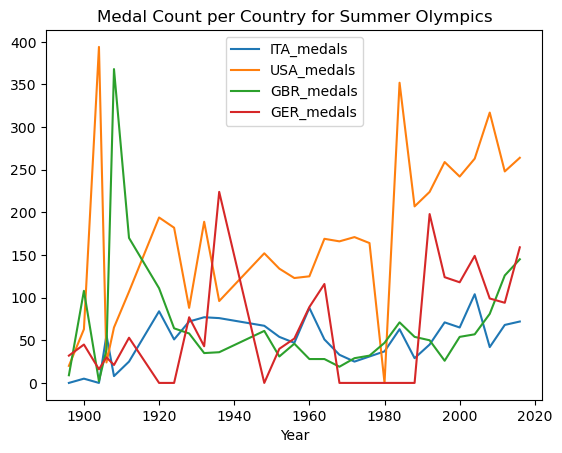

                Year  ITA_medals  USA_medals  GBR_medals  GER_medals
Year        1.000000    0.419652    0.518706   -0.140245    0.389056
ITA_medals  0.419652    1.000000    0.212996   -0.167955    0.442884
USA_medals  0.518706    0.212996    1.000000   -0.131996    0.173626
GBR_medals -0.140245   -0.167955   -0.131996    1.000000   -0.034485
GER_medals  0.389056    0.442884    0.173626   -0.034485    1.000000


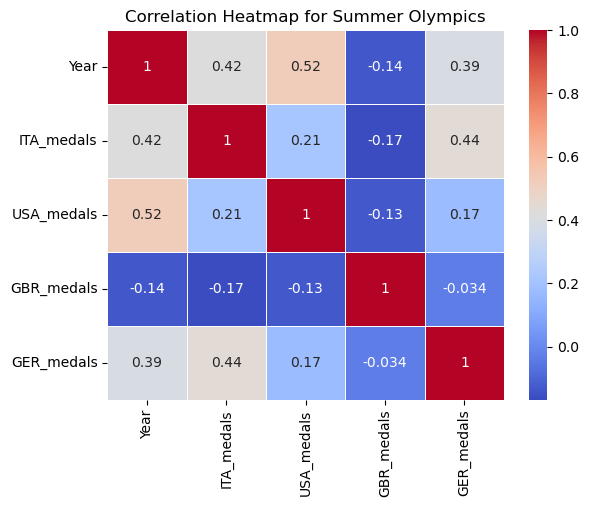

In [17]:
#Solve question here. Briefly justify your solution in the following markdown cell.

#filter for Summer Olympics only
dataxS = dataDF[dataDF["Season"] == "Summer"]

#create three new dataframes including USA, GBR and GER medal count for each year
usa_m = dataxS[dataxS["NOC"] == "USA"].groupby("Year")["Medal"].count().reset_index()
gbr_m = dataxS[dataxS["NOC"] == "GBR"].groupby("Year")["Medal"].count().reset_index()
ger_m = dataxS[dataxS["NOC"] == "GER"].groupby("Year")["Medal"].count().reset_index()

#join dfs together and renaming columns
ita_m0 = ita_mS.rename(columns = {"Medal_count":"ITA_medals"})
join1S = ita_m0.join(usa_m.set_index("Year"), on = "Year").rename(columns = {"Medal":"USA_medals"})
join2S = join1S.join(gbr_m.set_index("Year"), on = "Year").rename(columns = {"Medal":"GBR_medals"})
join3S = join2S.join(ger_m.set_index("Year"), on = "Year").rename(columns = {"Medal":"GER_medals"})

#fill Na values with 0 in order for the correlations to avoid potential biases
join3S.fillna(0, inplace=True)
print(join3S)

#plot the amount of medals won by each country each year
join3S.plot(x = "Year", y = ["ITA_medals", "USA_medals", "GBR_medals", "GER_medals"])
plt.title("Medal Count per Country for Summer Olympics")
plt.show ()

#calculate the correlations between countries
corrVals = join3S[["Year", "ITA_medals", "USA_medals", "GBR_medals", "GER_medals"]].corr()
print(corrVals)

#create a heatmap to better see the correlation strengths (I asked chatGPT how to do this)
import seaborn as sns

sns.heatmap(corrVals, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap for Summer Olympics")
plt.show()

    Year  ITA_medals  USA_medals  GBR_medals  GER_medals
0   1924           0          12          31         0.0
1   1928           0          14           1         5.0
2   1932           0          34           0        14.0
3   1936           0          16          17         7.0
4   1948           1          16           2         0.0
5   1952           2          30           1        12.0
6   1956           8          26           0         2.0
7   1960           1          27           0         9.0
8   1964          10           8           2        10.0
9   1968           8           7           0         0.0
10  1972           9          24           0         0.0
11  1976           4          11           1         0.0
12  1980           3          30           1         0.0
13  1984           2           9           2         0.0
14  1988           8           7           0         0.0
15  1992          21          14           0        38.0
16  1994          32          1

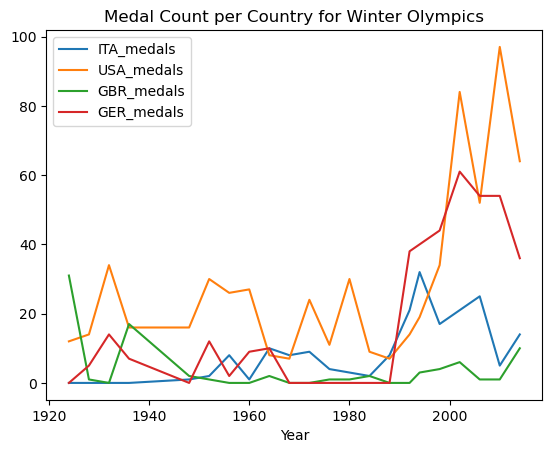

                Year  ITA_medals  USA_medals  GBR_medals  GER_medals
Year        1.000000    0.693486    0.547047   -0.320542    0.687878
ITA_medals  0.693486    1.000000    0.267962   -0.159586    0.728394
USA_medals  0.547047    0.267962    1.000000   -0.030342    0.765737
GBR_medals -0.320542   -0.159586   -0.030342    1.000000   -0.051874
GER_medals  0.687878    0.728394    0.765737   -0.051874    1.000000


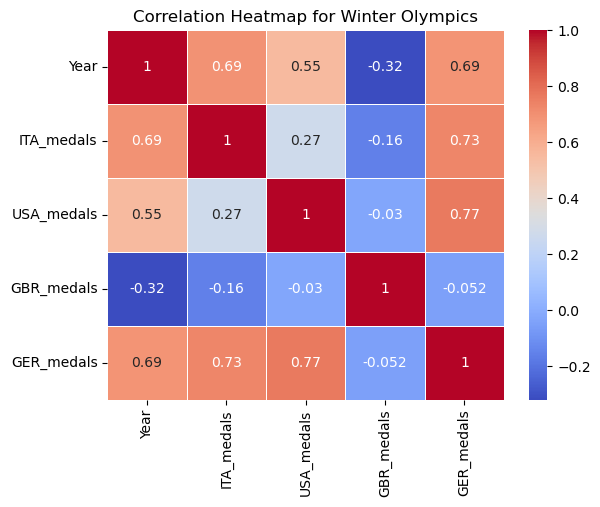

In [18]:
#filter for Winter Olympics only
dataxW = dataDF[dataDF["Season"] == "Winter"]

#create three new dataframes including USA, GBR and GER medal count for each year
usa_m = dataxW[dataxW["NOC"] == "USA"].groupby("Year")["Medal"].count().reset_index()
gbr_m = dataxW[dataxW["NOC"] == "GBR"].groupby("Year")["Medal"].count().reset_index()
ger_m = dataxW[dataxW["NOC"] == "GER"].groupby("Year")["Medal"].count().reset_index()

#join dfs together and renaming columns
ita_m1 = ita_mW.rename(columns = {"Medal_count":"ITA_medals"})
join1W = ita_m1.join(usa_m.set_index("Year"), on = "Year").rename(columns = {"Medal":"USA_medals"})
join2W = join1W.join(gbr_m.set_index("Year"), on = "Year").rename(columns = {"Medal":"GBR_medals"})
join3W = join2W.join(ger_m.set_index("Year"), on = "Year").rename(columns = {"Medal":"GER_medals"})

#fill Na values with 0 in order for the correlations to avoid potential biases
join3W.fillna(0, inplace=True)
print(join3W)

#plot the amount of medals won by each country each year
join3W.plot(x = "Year", y = ["ITA_medals", "USA_medals", "GBR_medals", "GER_medals"])
plt.title("Medal Count per Country for Winter Olympics")
plt.show ()

#calculate the correlations between countries
corrVals = join3W[["Year", "ITA_medals", "USA_medals", "GBR_medals", "GER_medals"]].corr()
print(corrVals)

#create a heatmap to better see the correlation strengths (I asked chatGPT how to do this)
import seaborn as sns

sns.heatmap(corrVals, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap for Winter Olympics")
plt.show()

**Present an interpretation of the results here:** 

**Summer Olympics:** Medal counts between Italy (ITA) and the Germany (GER) show a positive correlation (0.44), indicating a tendency for both countries to win medals concurrently. Italy also exhibits a similar relationship with the United States (USA) with a correlation of 0.21. However, the correlation between USA and Germany is weaker (0.17), suggesting a looser connection. Great Britain (GBR) has a weak negative correlation with all countries, implying that when these countries perform well, GBR tends to win fewer medals.
By examining the medal counts in the first table, we can visually confirm the correlation trends observed in the correlation matrix. For example, in several Olympic years, such as 1900, 1928, 1932, 1952, 1956, and more, both Italy and the USA tend to win medals concurrently. For instance, in 1900, Italy won 5 medals, and the USA won 63 medals. In 1956, Italy won 47 medals, and the USA won 123 medals. 

**Winter Olympics:** The Winter Olympics data generally displays different correlation coefficients between countries' medal counts than the Summer Olympics. For instance, the correlation between Italy (ITA) and Germany (GER) is 0.73 in comparison to 0.21 in the Summer Olympics. Additionally, USA and Germany (GER) have a stronger correlation of 0.77, while in the Summer Olympics, it was 0.17. Germany (GER) and Great Britain (GBR) have a more negative correlation of -0.052 in the Winter Olympics, whereas in the Summer Olympics it was -0.034, however with the other two countries, GBR has a more positive relationship. These differences suggest varying degrees of relationship in Winter and Summer Olympics.

### 4.b) Extended analysis

As medals are competitive, one could expect that the fact that some countries starts winning more medals leads other countries to win less medals. But this would only be true if the total number of medals would have remained constant.

Suggest an alternative analysis and implement it.



**Analysis proposed:**
The analysis I propose is to create a function which computes the ratio of medals won by each country relative to the total medals awarded each year. By doing this, the ratio shows the % of medals won each year allowing direct comparison over the years.


**Rationale of implementation:**
To simplify the analysis I chose to analyse only Summer Olympics. I started by calculating the total medals per year and joining the resulting column to the dataframe from the previous exercise including medal count for the four selected countries. I then created a function for each of the four countries with the purpose to calculate the ratio of medals won per country per year over the total awarded medals per year. In order to use the functions I used .apply(), creating a new column in the dataframe to store the results for each country. To visualize better the results, I decided to plot "Year" on the x-axis and the four new columns containing the ratios on the y-axis.

    Year  Total_Medals  ITA_medals  USA_medals  GBR_medals  GER_medals  \
0   1896           143           0        20.0           9        32.0   
1   1900           604           5        63.0         108        45.0   
2   1904           486           0       394.0           2        16.0   
3   1906           458          56        24.0          39        30.0   
4   1908           831           8        65.0         368        21.0   
5   1912           941          25       107.0         170        53.0   
6   1920          1308          84       194.0         111         0.0   
7   1924           832          51       182.0          64         0.0   
8   1928           734          72        88.0          58        77.0   
9   1932           647          77       189.0          35        43.0   
10  1936           917          76        96.0          36       224.0   
11  1948           852          67       152.0          61         0.0   
12  1952           897          54    

<Axes: xlabel='Year'>

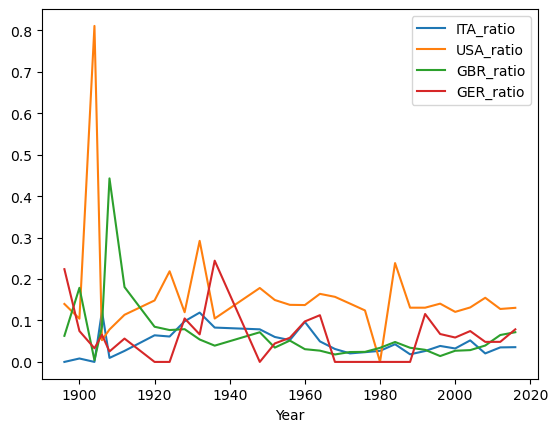

In [19]:
#calculate total medals per year for Summer Olympics
dataxS_ = dataDF[dataDF["Season"]=="Summer"]
totmy = dataxS_.groupby("Year")["Medal"].count().reset_index()

#join totmy with the dataframe from exercise 4a including the medal count per year for ITA, USA, GBR and GER
totmy1= totmy.join(join3S.set_index("Year"), on = "Year")

#rename column
totmy1.rename(columns={"Medal":"Total_Medals"}, inplace=True)

#create functions for each country calculating country medals over total medals
def calc_ita_ratio(row):
    if row['ITA_medals'] == 0:
        return 0
    return row['ITA_medals'] / row['Total_Medals']

def calc_usa_ratio(row):
    if row['USA_medals'] == 0:
        return 0
    return row['USA_medals'] / row['Total_Medals']

def calc_gbr_ratio(row):
    if row['GBR_medals'] == 0:
        return 0
    return row['GBR_medals'] / row['Total_Medals']

def calc_ger_ratio(row):
    if row['GER_medals'] == 0:
        return 0
    return row['GER_medals'] / row['Total_Medals']

#create a new column to apply the separate function ratios per country
totmy1['ITA_ratio'] = totmy1.apply(calc_ita_ratio, axis=1)
totmy1['USA_ratio'] = totmy1.apply(calc_usa_ratio, axis=1)
totmy1['GBR_ratio'] = totmy1.apply(calc_gbr_ratio, axis=1)
totmy1['GER_ratio'] = totmy1.apply(calc_ger_ratio, axis=1)

print(totmy1)
totmy2 = totmy1[["Year", "Total_Medals", "ITA_ratio", "USA_ratio", "GBR_ratio", "GER_ratio"]]

totmy2.plot(x="Year", y=["ITA_ratio", "USA_ratio", "GBR_ratio", "GER_ratio"])

**Rationale and comments:** By calculating the medal ratios, the analysis accounts for the changing number of total medals available in each Olympic year. This approach allows for a more accurate comparison of each country's performance over time. 

For example we can see by comparing Summer Olympics 1920 to 1924. In 1920, Italy won a total of 84 medals and United States a total of 194 medals, with a total of 1308 medals awarded that year. In 1924, however, Italy won 51 medals (33 less) and United States 182 (12 less), with a total of 832 medals awarded that year (476 less), so considerably less. This is reflected by the ratios: Italy went from 6.42% to 6.13% share of the total medals awarded, and United States went from 14.8% to 21.9%. This shows that even though the USA won slightly less medals, their share of total medals increased by roughly 7%, whiles Italy comparably had a simliar share amoung the two years and a much lower absolute amount of medals.

## Question 5

This group focus on implementation using Spark SQL.

In [ ]:
#1 - install needed software

!apt-get install openjdk-17-jdk-headless
!pip install pyspark

#2 - download the data file (this can also be done by uploading the data file in colab)

!pip install gdown
!gdown 'https://drive.google.com/uc?id=1FXFeLvuT5tN0S-7ay5T7sFAMv9BjwO_H'

#3 - loading the CSV file

import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.types import *
from pyspark.sql.functions import *

spark = SparkSession.builder \
.master("local") \
.appName("Simple test") \
.config("spark.sql.execution.arrow.pyspark.enabled", "true") \
.getOrCreate()

atFilename = "athlete_events.csv"

# Read a CSV file into a DataFrame
df = spark.read.option("header", True).option("inferSchema",True).csv(atFilename)

df.show()

### 5.a) Reimplement question 1.e in Spark SQL.


In [ ]:
df.createOrReplaceTempView("athlete_events")

med_count = """
    SELECT Name, 
        SUM(CASE WHEN Medal IN ('Gold', 'Silver', 'Bronze') THEN 1 ELSE 0 END) AS Total,
        SUM(CASE WHEN Medal = 'Gold' THEN 1 ELSE 0 END) AS Gold,
        SUM(CASE WHEN Medal = 'Silver' THEN 1 ELSE 0 END) AS Silver,
        SUM(CASE WHEN Medal = 'Bronze' THEN 1 ELSE 0 END) AS Bronze
    FROM athlete_events
    WHERE Medal IS NOT NULL
    GROUP BY Name
    ORDER BY TOTAL DESC
"""
med_count1 = spark.sql(med_count)
med_count1.show()

In [ ]:
"""
Since spark doesn't work on Jupyter notebook but only on Google colab, below is the output:

+--------------------+-----+----+------+------+
|                Name|Total|Gold|Silver|Bronze|
+--------------------+-----+----+------+------+
|Michael Fred Phel...|   28|  23|     3|     2|
|Larysa Semenivna ...|   18|   9|     5|     4|
|Nikolay Yefimovic...|   15|   7|     5|     3|
|         Takashi Ono|   13|   5|     4|     4|
|Borys Anfiyanovyc...|   13|   7|     4|     2|
| Edoardo Mangiarotti|   13|   6|     5|     2|
| Ole Einar Bjrndalen|   13|   8|     4|     1|
|  Ryan Steven Lochte|   12|   6|     3|     3|
|Dara Grace Torres...|   12|   4|     4|     4|
|Natalie Anne Coug...|   12|   3|     4|     5|
|Birgit Fischer-Sc...|   12|   8|     4|     0|
|"Jennifer Elisabe...|   12|   8|     3|     1|
|          Sawao Kato|   12|   8|     3|     1|
|Aleksey Yuryevich...|   12|   4|     2|     6|
|Paavo Johannes Nurmi|   12|   9|     3|     0|
|"Matthew Nicholas...|   11|   8|     2|     1|
|Viktor Ivanovych ...|   11|   7|     3|     1|
|Vra slavsk (-Odlo...|   11|   7|     4|     0|
|   Mark Andrew Spitz|   11|   9|     1|     1|
|Aleksandr Vladimi...|   11|   5|     6|     0|
+--------------------+-----+----+------+------+
only showing top 20 rows
"""

### 5.a) Reimplement question 1.d in Spark SQL.


In [ ]:
df.createOrReplaceTempView("athlete_events")

X = ("""  SELECT Season, Year, Total, Name
    FROM (
        SELECT
            Season,
            Year,
            Total,
            Name,
            ROW_NUMBER() OVER (PARTITION BY Year ORDER BY Total DESC) AS rn
        FROM (
            SELECT
                Season,
                Year,
                Name,
                SUM(CASE WHEN Medal IN ('Gold', 'Silver', 'Bronze') THEN 1 ELSE 0 END) AS Total
            FROM athlete_events
            WHERE Season = 'Summer' AND Year >= 1950
            GROUP BY Season, Year, Name
        ) medal_counts
    ) ranked
    WHERE rn = 1
    ORDER BY Year DESC
    """) 

X1 = spark.sql(X)
X1.show()

In [ ]:
"""
Since spark doesn't work on Jupyter notebook but only on Google colab, below is the output:

+------+----+-----+--------------------+
|Season|Year|Total|                Name|
+------+----+-----+--------------------+
|Summer|2016|    6|Michael Fred Phel...|
|Summer|2012|    6|Michael Fred Phel...|
|Summer|2008|    8|Michael Fred Phel...|
|Summer|2004|    8|Michael Fred Phel...|
|Summer|2000|    6|Aleksey Yuryevich...|
|Summer|1996|    6|Aleksey Yuryevich...|
|Summer|1992|    6|Vitaly Venediktov...|
|Summer|1988|    7|"Matthew Nicholas...|
|Summer|1984|    6|             Li Ning|
|Summer|1980|    8|Aleksandr Nikolay...|
|Summer|1976|    7|Nikolay Yefimovic...|
|Summer|1972|    7|   Mark Andrew Spitz|
|Summer|1968|    7|Mikhail Yakovlevi...|
|Summer|1964|    6|Larysa Semenivna ...|
|Summer|1960|    7|Borys Anfiyanovyc...|
|Summer|1956|    6|Larysa Semenivna ...|
|Summer|1952|    7|Mariya Kindrativn...|
+------+----+-----+--------------------+
"""